# Build models programmatically using Python API

## The SAS Python SWAT package enables you to connect to SAS Cloud Analytic Services (CAS) engine that is the centerpiece of the SAS Viya framework. 

## In order to access this functionality, the SAS SWAT package must first be downloaded and installed from https://github.com/sassoftware/python-swat

In [1]:
# Import packages
from swat import *
from pprint import pprint
from swat.render import render_html
from matplotlib import pyplot as plt
import pandas as pd
import sys
%matplotlib inline

In [2]:
# Start a CAS session
cashost='<your CAS server here>'
casport=<your CAS server port here>
casauth="~/.authinfo"
sess = CAS(cashost, casport, authinfo=casauth, caslib="public")

In [3]:
# Set helper variables
gcaslib="public"
prepped_data="bank_prepped"
target = {"b_tgt"}
class_inputs = {"cat_input1", "cat_input2", "demog_ho", "demog_genf"}
interval_inputs = {"im_demog_age", "im_demog_homeval", "im_demog_inc", "demog_pr", "log_rfm1", "rfm2", "log_im_rfm3", "rfm4", "rfm5", "rfm6", "rfm7", "rfm8", "rfm9", "rfm10", "rfm11", "rfm12"}
class_vars = target | class_inputs

## Train and score Stepwise Regression model using the data prepared in SAS Studio

In [4]:
# Load action set
sess.loadactionset(actionset="regression")

# Train Logistic Regression
lr=sess.regression.logistic(
  table={"name":prepped_data, "caslib":gcaslib},
  classVars=[{"vars":class_vars}],
  model={
    "depVars":[{"name":"b_tgt", "options":{"event":"1"}}],
    "effects":[{"vars":class_inputs | interval_inputs}]
  },
  partByVar={"name":"_partind_", "train":"1", "valid":"0"},
  selection={"method":"STEPWISE"},
  output={"casOut":{"name":"_scored_logistic", "replace":True}, "copyVars":{"account", "b_tgt", "_partind_"}}
)

# Output model statistics
render_html(lr)

# Compute p_b_tgt0 and p_b_tgt1 for assessment
sess.dataStep.runCode(
  code="data _scored_logistic; set _scored_logistic; p_b_tgt0=1-_pred_; rename _pred_=p_b_tgt1; run;"
)

NOTE: Added action set 'regression'.
NOTE: Convergence criterion (GCONV=1E-8) satisfied.


Model Information 
 RowId 
 Description 
 Value 
 
 
 DATA Data Source BANK_PREPPED 
 RESPONSEVAR Response Variable b_tgt 
 DIST Distribution Binary 
 LINK Link Function Logit 
 TECH Optimization Technique Newton-Raphson with Ridging 
 
 
 
 
 Number of Observations 
 RowId 
 Description 
 Total 
 Training 
 Validation 
 
 
 NREAD Number of Observations Read 485452 339405 146047 
 NUSED Number of Observations Used 479001 334928 144073 
 
 
 
 
 Response Profile 
 Ordered Value 
 b_tgt 
 b_tgt 
 Total Frequency 
 Training 
 Validation 
 Probability Modeled 
 
 
 1 0 0 382846 267721 115125 
 2 1 1 96155 67207 28948 * 
 
 
 
 
 Class Level Information 
 Class 
 Levels 
 Values 
 
 
 demog_genf 2 0 1 
 cat_input2 5 A B C D E 
 cat_input1 3 X Y Z 
 demog_ho 2 0 1 
 
 
 
 
 Selection Information 
 Description 
 Value 
 Numeric Value 
 
 
 Selection Method Stepwise nan 
 Select Criterion SBC nan 
 Stop Criterion SBC nan 
 Effect Hierarchy Enforced None nan 
 Stop Horizon 3 3 
 
 
 
 
 Convergence Status 
 Reason 
 Status 
 Max Gradient 
 
 
 Convergence criterion (GCONV=1E-8) satisfied. 0 1.6972957E-9 
 
 
 
 
 Selection Summary 
 Control 
 Step 
 Effect Entered 
 Effect Removed 
 Number Of Effects 
 SBC 
 Optimal SBC 
 
 
 0 Intercept 1 335823.22468 0 
 - 1 rfm5 2 290049.1829 0 
 2 IM_demog_homeval 3 274382.34771 0 
 3 LOG_RFM1 4 257507.89668 0 
 4 rfm9 5 240126.58238 0 
 5 rfm12 6 238716.80867 0 
 6 cat_input1 7 237979.37684 0 
 7 cat_input2 8 237499.27748 0 
 8 rfm4 9 237290.67201 1 
 
 
 
 
 Stop Reason 
 Reason 
 Code 
 
 
 Stepwise selection stopped because adding or removing an effect does not improve the SBC criterion. 8 
 
 
 
 
 Selection Reason 
 Reason 
 
 
 The model at step 8 is selected. 
 
 
 
 
 Selected Effects 
 Label 
 Effects 
 
 
 Selected Effects: Intercept cat_input1 rfm9 LOG_RFM1 rfm12 cat_input2 rfm4 IM_demog_homeval rfm5 
 
 
 
 
 Dimensions 
 RowId 
 Description 
 Value 
 
 
 NDESIGNCOLS Columns in Design 15 
 NEFFECTS Number of Effects 9 
 MAXEFCOLS Max Effect Columns 5 
 DESIGNRANK Rank of Design 13 
 OPTPARM Parameters in Optimization 13 
 
 
 
 
 Likelihood Ratio Test 
 Test 
 DF 
 Chi-Square 
 Pr > ChiSq 
 
 
 Likelihood Ratio 12 98498.027651 0 
 
 
 
 
 Fit Statistics 
 RowId 
 Description 
 Training 
 Validation 
 
 
 M2LL -2 Log Likelihood 237312.47536 102563.03002 
 AIC AIC (smaller is better) 237338.47536 102589.03002 
 AICC AICC (smaller is better) 237338.47644 102589.03255 
 SBC SBC (smaller is better) 237477.85708 102717.445 
 ASE Average Square Error 0.1104935231 0.1112464707 
 M2LLNULL -2 Log L (Intercept-only) 335810.50301 144558.04897 
 RSQUARE R-Square 0.2547884714 0.2528462634 
 ADJRSQ Max-rescaled R-Square 0.4024530966 0.3992160167 
 MCFADDEN McFadden's R-Square 0.293314315 0.2905062655 
 MISCLASS Misclassification Rate 0.1556065781 0.1568788045 
 DIFFMEAN Difference of Means 0.3123048582 0.3089769919 
 
 
 
 
 Parameter Estimates 
 Effect 
 cat_input1 
 cat_input2 
 Parameter 
 Parameter 
 DF 
 Estimate 
 Standard Error 
 Chi-Square 
 Pr > ChiSq 
 
 
 Intercept Intercept Intercept 1 2.9403074038 0.0475833267 3818.3512118 0 
 cat_input1 X cat_input1 X cat_input1_X 1 0.6492219402 0.0239913822 732.27774713 2.86364E-161 
 cat_input1 Y cat_input1 Y cat_input1_Y 1 0.5982330859 0.0298239181 402.35690791 1.689932E-89 
 cat_input1 Z cat_input1 Z cat_input1_Z 0 0 nan nan nan 
 rfm9 rfm9 rfm9 1 -0.164985033 0.0013854125 14181.784788 0 
 LOG_RFM1 LOG_RFM1 LOG_RFM1 1 -1.666737455 0.0127879211 16987.69648 0 
 rfm12 rfm12 rfm12 1 0.0041828148 0.00015299 747.50045893 1.40247E-164 
 cat_input2 A cat_input2 A cat_input2_A 1 0.2881918545 0.0174243394 273.55884525 1.902361E-61 
 cat_input2 B cat_input2 B cat_input2_B 1 0.3163101691 0.016016355 390.03083017 8.150148E-87 
 cat_input2 C cat_input2 C cat_input2_C 1 0.2128486231 0.0168797636 159.00433644 1.867209E-36 
 cat_input2 D cat_input2 D cat_input2_D 1 0.1514813087 0.018757207 65.220144329 6.698132E-16 
 cat_input2 E cat_input2 E cat_input2_E 0 0 nan na

NOTE: Missing values were generated as a result of performing an operation on missing values.
      Each place is given by: (Number of times) at (Line):(Column).
      154 at 0:55
      121 at 0:55
      85 at 0:55
      90 at 0:55
      255 at 0:55
      110 at 0:55
      178 at 0:55
      109 at 0:55
      440 at 0:55
      694 at 0:55
      665 at 0:55
      718 at 0:55
      657 at 0:55
      794 at 0:55
      673 at 0:55
      708 at 0:55
NOTE: Duplicate messages output by DATA step:
NOTE: Missing values were generated as a result of performing an operation on missing values.  (occurred 16 times)
      Each place is given by: (Number of times) at (Line):(Column).  (occurred 16 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(ramyne),_scored_logistic,485452,4,"CASTable('_scored_logistic', caslib='CASUSER(r..."


## Load the GBM model create in SAS Visual Analytics and score using this model

In [5]:
# 1. Load GBM model (ASTORE) created in VA
sess.loadTable(
  caslib="models", path="Gradient_Boosting_VA.sashdat", 
  casout={"name":"gbm_astore_model","caslib":"casuser", "replace":True}
)

# 2. Score code from VA (for data preparation)
sess.dataStep.runCode(
  code="""data bank_part_post; 
            set bank_part(caslib='public'); 
            _va_calculated_54_1=round('b_tgt'n,1.0);
            _va_calculated_54_2=round('demog_genf'n,1.0);
            _va_calculated_54_3=round('demog_ho'n,1.0);
            _va_calculated_54_4=round('_PartInd_'n,1.0);
          run;"""
)

# 3. Score using ASTORE
sess.loadactionset(actionset="astore")

sess.astore.score(
  table={"name":"bank_part_post"},
  rstore={"name":"gbm_astore_model"},
  out={"name":"_scored_gbm", "replace":True},
  copyVars={"account", "_partind_", "b_tgt"}
)

# 4. Rename p_b_tgt0 and p_b_tgt1 for assessment
sess.dataStep.runCode(
  code="""data _scored_gbm; 
            set _scored_gbm; 
            rename p__va_calculated_54_10=p_b_tgt0
                   p__va_calculated_54_11=p_b_tgt1;
          run;"""
)

NOTE: Cloud Analytic Services made the file Gradient_Boosting_VA.sashdat available as table GBM_ASTORE_MODEL in caslib CASUSER(ramyne).
NOTE: Added action set 'astore'.


,casLib,Name,Rows,Columns,casTable
0,CASUSER(ramyne),_scored_gbm,485452,7,"CASTable('_scored_gbm', caslib='CASUSER(ramyne)')"


## Load the Forest model created in SAS Studio and score using this model

In [6]:
# Load action set 
sess.loadactionset(actionset="decisionTree")

# Score using forest_model table
sess.decisionTree.forestScore(
  table={"name":prepped_data, "caslib":gcaslib},
  modelTable={"name":"forest_model", "caslib":"public"},
  casOut={"name":"_scored_rf", "replace":True},
  copyVars={"account", "b_tgt", "_partind_"},
  vote="PROB"
)

# Create p_b_tgt0 and p_b_tgt1 as _rf_predp_ is the probability of event in _rf_predname_
sess.dataStep.runCode(
  code="""data _scored_rf; 
            set _scored_rf; 
            if _rf_predname_=1 then do; 
              p_b_tgt1=_rf_predp_; 
              p_b_tgt0=1-p_b_tgt1; 
            end; 
            if _rf_predname_=0 then do; 
              p_b_tgt0=_rf_predp_; 
              p_b_tgt1=1-p_b_tgt0; 
            end; 
          run;"""
)

NOTE: Added action set 'decisionTree'.
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:61    0:192
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 16 times)
      0:61    0:192  (occurred 16 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(ramyne),_scored_rf,485452,8,"CASTable('_scored_rf', caslib='CASUSER(ramyne)')"


## Load the SVM model created in SAS Studio and score using this model

In [7]:
# Score using ASTORE
sess.loadactionset(actionset="astore")

sess.astore.score(
  table={"name":prepped_data, "caslib":gcaslib},
  rstore={"name":"svm_astore_model", "caslib":"public"},
  out={"name":"_scored_svm", "replace":True},
  copyVars={"account", "_partind_", "b_tgt"}
)

NOTE: Added action set 'astore'.


,Task,Seconds,Percent
0,Loading the Store,0.000010,0.000010
1,Creating the State,0.005296,0.005052
2,Scoring,1.042918,0.994932
3,Total,1.048230,1.000000


## Assess models from SAS Visual Analytics, SAS Studio and the new models created in Python interface

In [8]:
# Assess models
def assess_model(prefix):
    return sess.percentile.assess(
      table={
        "name":"_scored_" + prefix, 
        "where": "strip(put(_partind_, best.))='0'"
      },
      inputs=[{"name":"p_b_tgt1"}],      
      response="b_tgt",
      event="1",
      pVar={"p_b_tgt0"},
      pEvent={"0"}      
    )

lrAssess=assess_model(prefix="logistic")    
lr_fitstat =lrAssess.FitStat
lr_rocinfo =lrAssess.ROCInfo
lr_liftinfo=lrAssess.LIFTInfo

rfAssess=assess_model(prefix="rf")    
rf_fitstat =rfAssess.FitStat
rf_rocinfo =rfAssess.ROCInfo
rf_liftinfo=rfAssess.LIFTInfo

gbmAssess=assess_model(prefix="gbm")    
gbm_fitstat =gbmAssess.FitStat
gbm_rocinfo =gbmAssess.ROCInfo
gbm_liftinfo=gbmAssess.LIFTInfo

svmAssess=assess_model(prefix="svm")    
svm_fitstat =svmAssess.FitStat
svm_rocinfo =svmAssess.ROCInfo
svm_liftinfo=svmAssess.LIFTInfo

In [9]:
# Add new variable to indicate type of model
lr_liftinfo["model"]="Logistic (Python API)"
lr_rocinfo["model"]='Logistic (Python API)'
rf_liftinfo["model"]="Autotuned Forest (SAS Studio)"
rf_rocinfo["model"]="Autotuned Forest (SAS Studio)"
gbm_liftinfo["model"]="Gradient Boosting (SAS VA)"
gbm_rocinfo["model"]="Gradient Boosting (SAS VA)"
svm_liftinfo["model"]="SVM (SAS Studio)"
svm_rocinfo["model"]="SVM (SAS Studio)"

# Append data
all_liftinfo=lr_liftinfo.append(rf_liftinfo, ignore_index=True) \
    .append(gbm_liftinfo, ignore_index=True)  \
    .append(svm_liftinfo, ignore_index=True)  
all_rocinfo=lr_rocinfo.append(rf_rocinfo, ignore_index=True) \
    .append(gbm_rocinfo, ignore_index=True) \
    .append(svm_rocinfo, ignore_index=True) 
    
print("AUC (using validation data)".center(80, '-'))
all_rocinfo[["model", "C"]].drop_duplicates(keep="first").sort_values(by="C", ascending=False)    

--------------------------AUC (using validation data)---------------------------


,model,C
100,Autotuned Forest (SAS Studio),0.947950
300,SVM (SAS Studio),0.871695
0,Logistic (Python API),0.860070
200,Gradient Boosting (SAS VA),0.855693


## Draw Assessment Plots

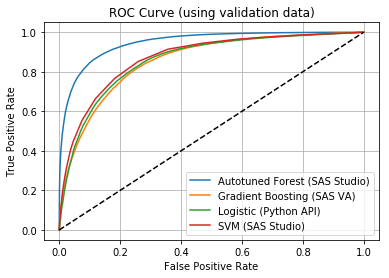

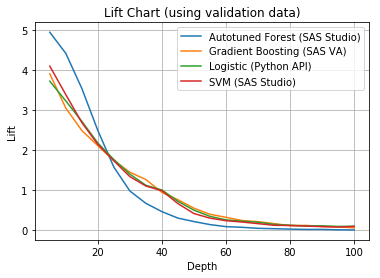

In [10]:
# Draw ROC charts  
plt.figure()
for key, grp in all_rocinfo.groupby(["model"]):
    plt.plot(grp["FPR"], grp["Sensitivity"], label=key)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend(loc="best")
plt.title("ROC Curve (using validation data)")
plt.show()

# Draw lift charts 
plt.figure()
for key, grp in all_liftinfo.groupby(["model"]):
    plt.plot(grp["Depth"], grp["Lift"], label=key)
plt.xlabel("Depth")
plt.ylabel("Lift")
plt.grid(True)
plt.legend(loc="best")
plt.title("Lift Chart (using validation data)")
plt.show()

In [ ]:
# Close the CAS session
# sess.close()